## Using Data Science to Predict Fires in the Algerian Forest from Weather Characteristics
### Introduction
A forest fire is an unplanned and an uncontrollable fire which can occur by lightning or human carelessness in forests, grasslands or shrubbery (Government of Canada, 2020). The vast majority of forest fires are human-caused. However dry climate, hot temperatures, lightning and volcanic eruption can also lead to them occurring (National Park Service, 2018). The past decade of climate change has only exacerbated the amount of forest fires occuring, leading to longer and more extreme occurences
 
Wildfire agencies uses many variables that may indicate an imminent wildfire. Furthermore, the evolution of machine learning has provided the ability to predict future events based on analyzing variables. Thus, we pose the predictive question: do certain variables allow us to determine if a forest fire has or will occur and if so, how accurate will they be? 
 
To support our hypothesis, we used a dataset on Algerian Forest Fires from UCI (Faroudja & Izeboudjen, 2020). The dataset contains a culmination of forest fires in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset was taken from June 2012 to September 2012. We then focused on whether certain weather characteristics can predict forest fires in these regions using the K-NN Classification algorithm and later, we evaluated the accuracy of the model.


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(GGally)
library(cowplot)
set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## Methods

#### Reading Data into R

The Algerian Forest Fires Dataset was read into through the web through the `read_csv` function. 14 null values were found in the raw dataset and were remedied by dropping them while passing the `read_csv` function. Since K-NN Classfication requires numerical variables to predict an outcome, we  converted all variables to numerical values and set the variable `Classes` as a factor to predict whether if fires occur (`fire`) or otherwise (`not fire`). Our cleaned data is shown in Table 1 below.

In [27]:
check_na_values<-read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv', skip=1)
summary(is.na(check_na_values))

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


    day            month            year         Temperature    
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:246       FALSE:245       FALSE:245       FALSE:245      
                 TRUE :1         TRUE :1         TRUE :1        
     RH              Ws             Rain            FFMC        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:245       FALSE:245       FALSE:245       FALSE:245      
 TRUE :1         TRUE :1         TRUE :1         TRUE :1        
    DMC              DC             ISI             BUI         
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:245       FALSE:245       FALSE:245       FALSE:245      
 TRUE :1         TRUE :1         TRUE :1         TRUE :1        
    FWI           Classes       
 Mode :logical   Mode :logical  
 FALSE:245       FALSE:244      
 TRUE :1         TRUE :2        

In [28]:
forest_fire<-read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv', skip=1)%>%
    select(-day, -month, -year)%>%
        filter(Classes!='Classes',
                Temperature!='NA',
                  RH!='NA',
                  Rain!='NA',
                    Ws!='NA',
                   FFMC!="NA",
                   DMC!="NA",
                   DC!="NA",
                   ISI!="NA",
                   BUI!="NA",
                   FWI!="NA") %>%
    mutate(Classes=as_factor(Classes),
        Temperature=as.numeric(Temperature),   
        RH=as.numeric(RH),
        Rain=as.numeric(Rain),
        Ws=as.numeric(Ws),
        FFMC=as.numeric(FFMC),
        DMC=as.numeric(DMC),
        DC=as.numeric(DC),
        ISI=as.numeric(ISI),
        BUI=as.numeric(BUI),
        FWI=as.numeric(FWI)) 

 head(forest_fire)

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire


 <font color='grey'>Table 1: Initial Table for Algerian Forest Fires</font> 

#### Creating and Visualizing Training Data

In order to ensure our classification is accurate, we splitted the data into two sets: the training set and the testing set. Since we knew beforehand the `Classes` for the testing set, we were able to evaluate the accuracy of the classifier by predicting the training set with the testing set and thus, have better confidence to predict the likelihood of a forest fire should new data with similar variables be presented in the future.

The prop was set to 75% as the original dataset is assessed to be small (249 entries). By propping to 75%, we were able to give the training set more samples of the data, which resulted in yielding more accurate outcomes for our test dataset. Our target variable would still be `Classes` since that was the variable we wish to predict.

In [29]:
forest_fire_split<- initial_split(forest_fire, prop= 0.75, strata= Classes)
forest_fire_train<-training(forest_fire_split)
forest_fire_test<-training(forest_fire_split)

In order to assist us to select the variables we want in our analysis, we used `ggpairs` to visualize the correlation between the combination of variables found in the dataset (See Figure 1).

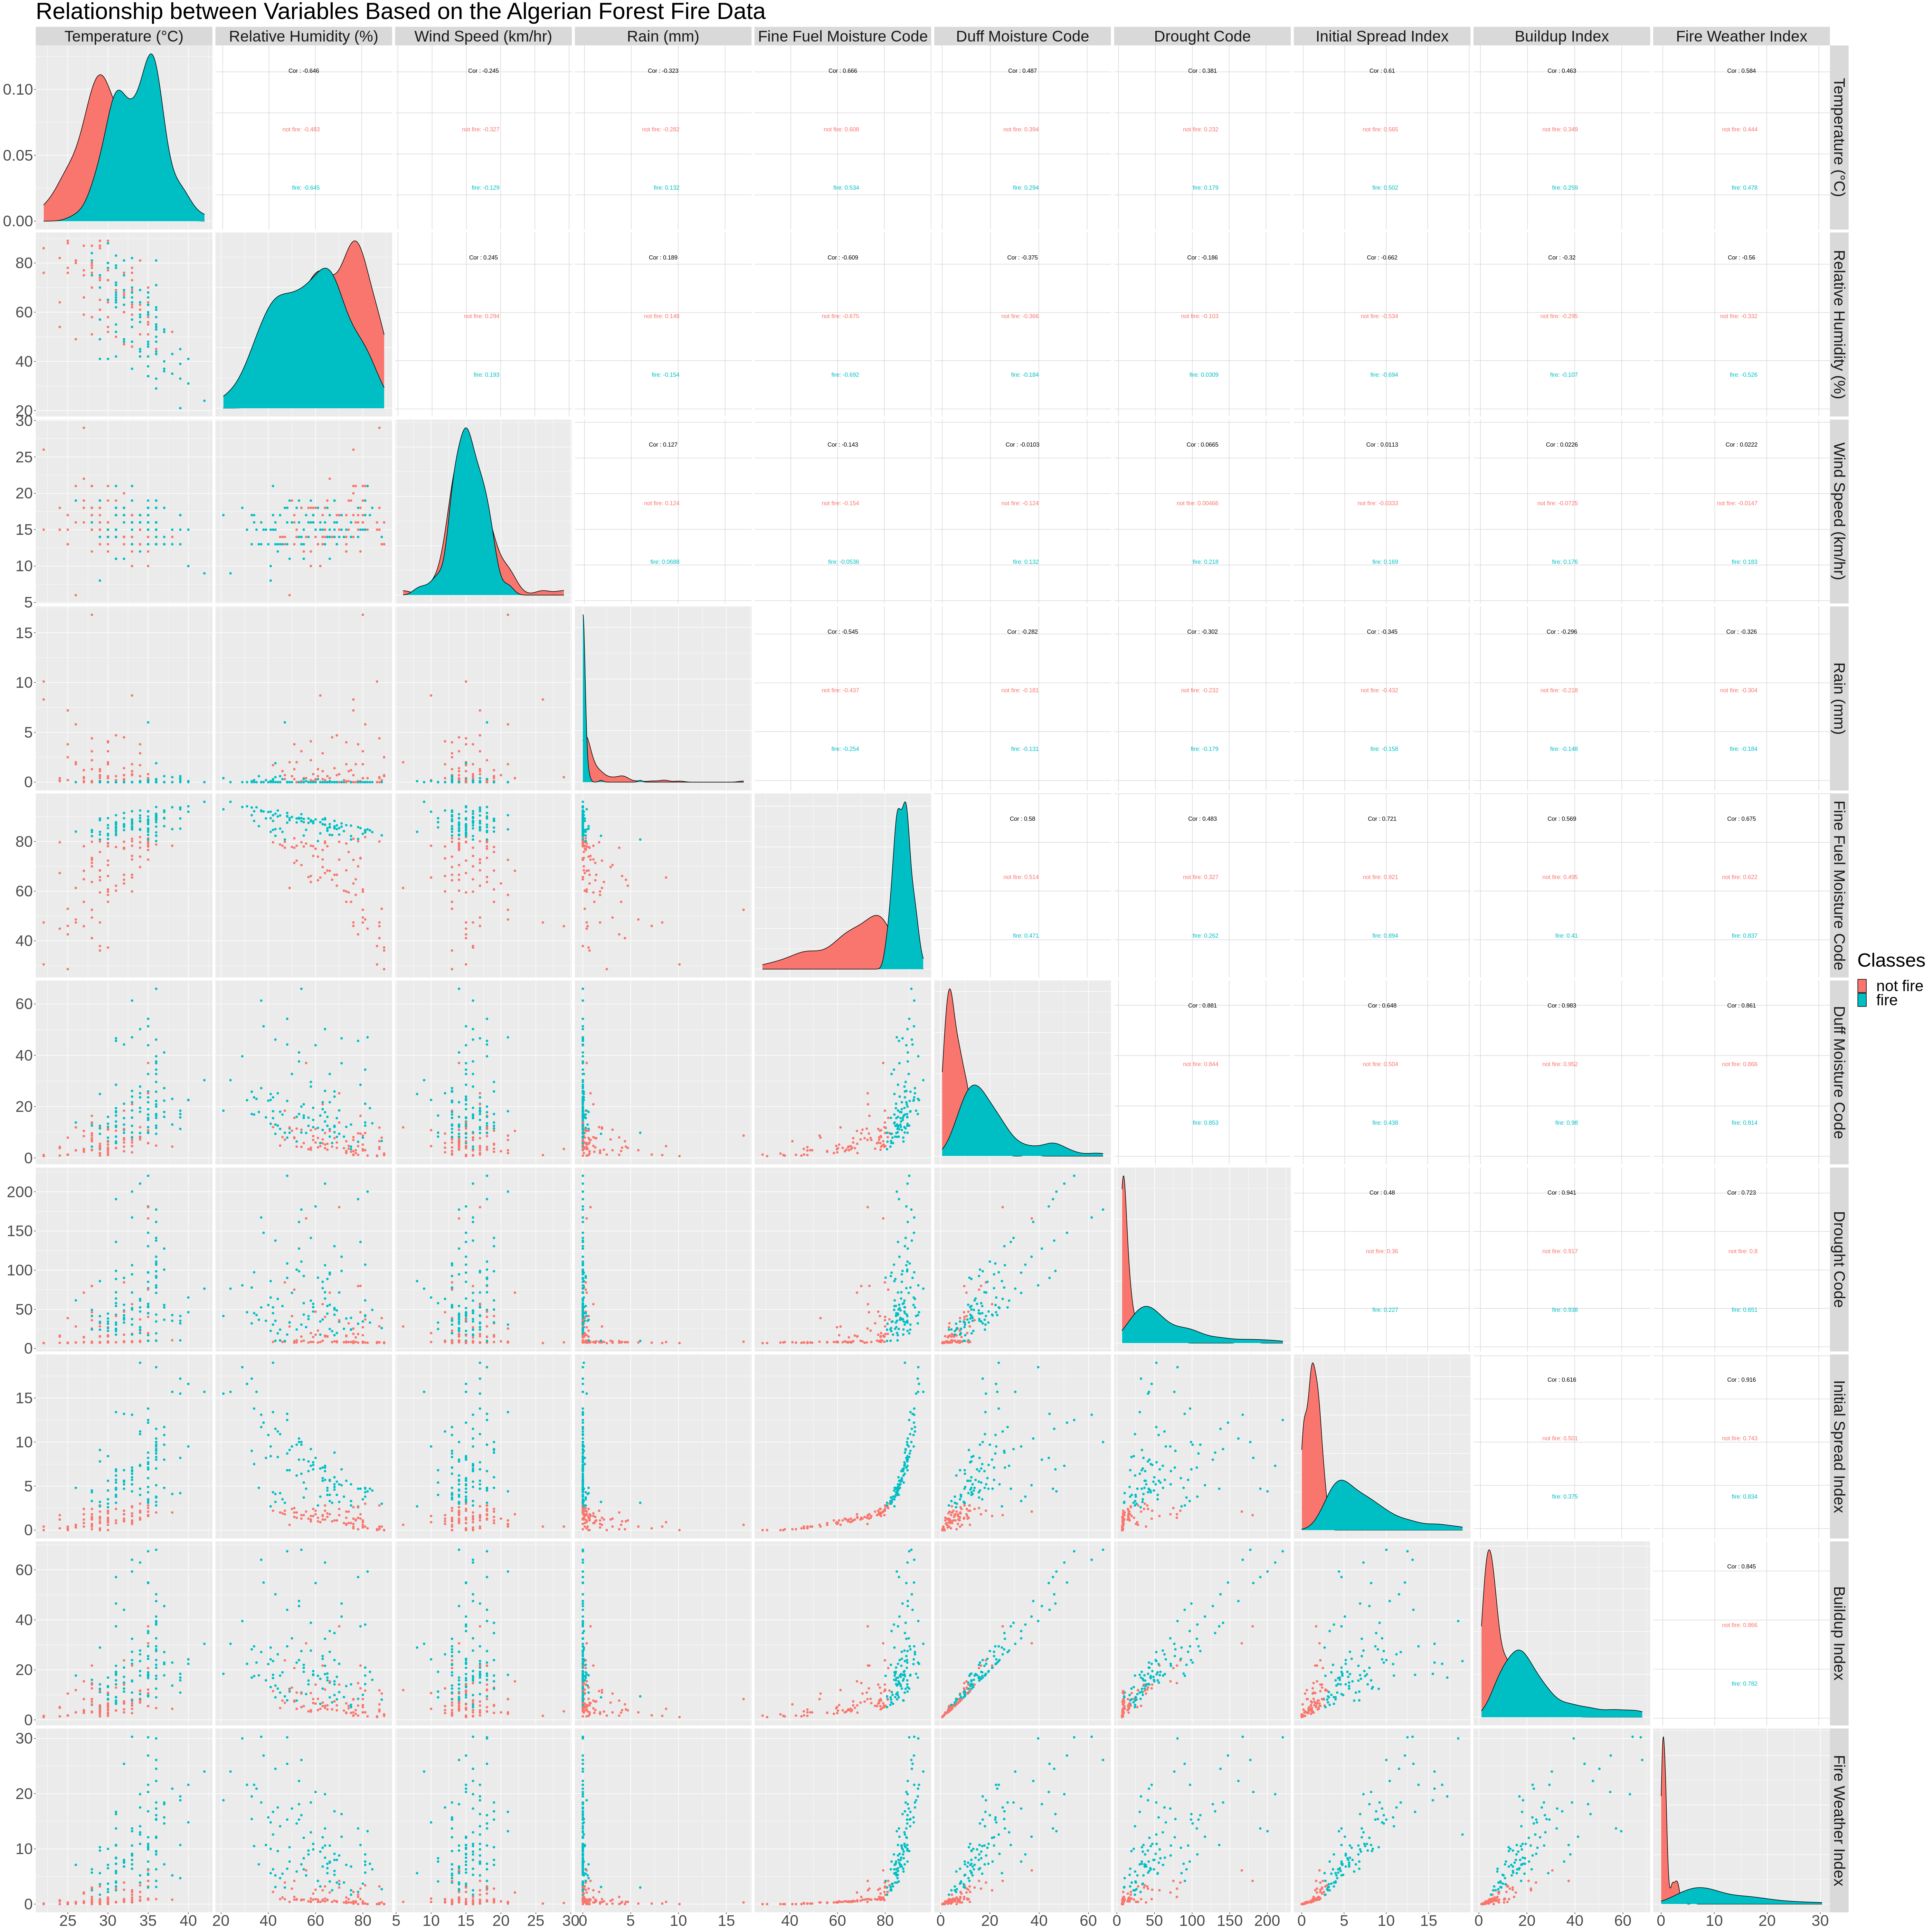

In [30]:
options(repr.plot.width=50, repr.plot.height=50)
forest_fire_graph <- forest_fire_train %>%
    ggpairs(columns =c('Temperature', 'RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI'),
            columnLabels=c('Temperature (°C)', 'Relative Humidity (%)','Wind Speed (km/hr)', 'Rain (mm)','Fine Fuel Moisture Code','Duff Moisture Code',
                           'Drought Code','Initial Spread Index', 'Buildup Index','Fire Weather Index'),
            legend=1,
           aes(color=Classes))+
    ggtitle("Relationship between Variables Based on the Algerian Forest Fire Data") + 
    theme(text=element_text(size=36))


forest_fire_graph


 <font color='grey'>Figure 1: Plots based on the various variables in the Algerian Forest Fires Dataset</font> 

Based on the graph, the variables with the strong correlation and clustering found in our initial exploratory graph were chosen as predictors for our K-NN model. The following variables are:
- Duff Moisture Code `DMC`  from 1.1 to 65.9  
- Drought Code `DC`  from 7 to 220.4  
- Initial Spread Index `ISI`  from 0 to 18.5  
- Buildup Index `BUI`  from 1.1 to 68  
- Fire Weather Index `FWI`  from 0 to 31.1


The data analysis was conducted in two main steps: Finding the $K$ value through cross valiadation and then computing the accuracy of our prediction. The cross validation allowed us to choose the optimal $K$ value to utilize and yield accurate results in our classification model.

Next, we used our $K$ found in cross validation to predict the testing data with the trained data through a classification workflow and then computed the accuracy of the prediction. Since this was an analysis using multiple variables, we chose to plot two graphs with to types of cross validations comparing accuracy against $K$. The following details of these two main steps are as followed below.


#### Data Analysis: Choosing the K Value

Our initial step in our data analysis was to find  the most accurate $K$ value to use in our analysis. This was conducted in three steps:

First, we used the `nearest_neighbor` function and passed in the `tune()` function to tune our nearest neighbor model.

In [5]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Since K-NN classification predicts the classes of `fire` or `not_fire` by identifying nearby observations, it is imperative to ensure that variables with a larger value will not influence the other datapoints with a smaller value. Thus, we created a recipe and scaled the variables we chose in `forest_fire_train`. Note that this recipe is to be reused later in our data analysis after finding the $K$ value.

 

In [6]:
forest_fire_recipe <- recipe(Classes ~ DMC + DC + ISI + BUI + FWI, data = forest_fire_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())
forest_fire_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Next, we conducted both a 5-fold and 10-fold cross validation to divide the training data into 5 and 10 folds respectively (see Table 2 and Table 3). Each fold in the total number of folds will be given the oportunity to be a validation set. This is to prevent parts of the training data from being underrepresented and minimize selection bias.


In [7]:
forest_fire_vfold_5 <- vfold_cv(forest_fire_train, v = 5, strata = Classes)

forest_fire_results_5 <- workflow() %>%
  add_recipe(forest_fire_recipe) %>%
  add_model(knn_tune) %>%
  tune_grid(resamples = forest_fire_vfold_5, grid = 10) %>%
  collect_metrics()
head(forest_fire_results_5)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.9509009,5,0.005338255,Model01
2,roc_auc,binary,0.9711310,5,0.013206374,Model01
3,accuracy,binary,0.9507508,5,0.010398914,Model02
3,roc_auc,binary,0.9875000,5,0.006796540,Model02
4,accuracy,binary,0.9507508,5,0.010398914,Model03
4,roc_auc,binary,0.9907292,5,0.006362786,Model03


 <font color='grey'>Table 2: 5- Fold cross validation results</font> 

In [8]:
forest_fire_vfold_10 <- vfold_cv(forest_fire_train, v = 10, strata = Classes)

forest_fire_results_10 <- workflow() %>%
  add_recipe(forest_fire_recipe) %>%
  add_model(knn_tune) %>%
  tune_grid(resamples = forest_fire_vfold_10, grid = 10) %>%
  collect_metrics()


head(forest_fire_results_10)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.9406433,10,0.020064957,Model1
2,roc_auc,binary,0.9742614,10,0.009932642,Model1
4,accuracy,binary,0.9570175,10,0.015367808,Model2
4,roc_auc,binary,0.9827841,10,0.007832327,Model2
6,accuracy,binary,0.9514620,10,0.016809404,Model3
6,roc_auc,binary,0.9907386,10,0.006729777,Model3


 <font color='grey'>Table 3: 10- Fold cross validation results</font> 

Finally, we selected the best value of the number of neighbours by filtering out the maximum mean in Table 2 and Table 3 (See Table 4 and 5). 

In [9]:
accuracies_5 <- forest_fire_results_5 %>%
    filter(.metric == "accuracy") %>%
    filter(mean == max(mean))
accuracies_5 #knn nearest neighbour for highest accuracy with a 5-fold cross-validation

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.9836336,5,0.006682947,Model05
8,accuracy,binary,0.9836336,5,0.006682947,Model06


 <font color='grey'>Table 4: The nearest-neighbour for the 5-fold cross validaiton result based on the highest mean.</font> 

In [10]:
accuracies_10 <- forest_fire_results_10 %>%
    filter(.metric == "accuracy") %>%
    filter(mean == max(mean)) 
accuracies_10   #knn nearest neighbor for highest accuracy with a 10-fold cross-validation

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.9616959,10,0.01414733,Model5
12,accuracy,binary,0.9616959,10,0.01414733,Model6


 <font color='grey'>Table 5: The nearest-neighbour for the 10-fold cross validaiton result based on the highest mean.</font> 

Table 4 showed that when $C = 5$ (i.e. 5-fold cross-validation), the $K$ nearest neighbor with the highest accuracy was $K = 7$ and $K= 8$. In contrast, Table 5 showed that when $C = 10$ (i.e. 10-fold cross-validation), the $K$ nearest neighbours with equally high accuracies were both $K = 11$ and $K = 12$.

Comparing both Tables 4 and 5, we saw that $K= 7$ and $K=8$  had a lower standard error than $K = 11$ and $K=12$. Therefore, we concluded that using a 5-fold cross validation with $K = 7$ was the best model for our classifier to predict the occurences of fires in our testing data (we chose the odd number to avoid ties). Furthermore, the computation power was sufficient enough to handle a 5 fold cross validation but started to slow down when using a 10 Fold Cross Validation. 


#### Data Analysis: Predicting the Testing Data

With the $K$ value chosen as $7$, we once again called the `nearest_neighbor` function to create our classification specification by using $K=7$ with our engine being `kknn` and our mode to be `classification`.

In [11]:
forest_fire_spec<- nearest_neighbor(weight_func = 'rectangular', neighbors = 7) %>%
       set_engine('kknn') %>%
       set_mode('classification')

Next, we added the recipe and the model together in a workflow. Futhermore, we specified that the whole workflow will be applied to the training dataset using the `fit` function. This made a formula for us to prepare to predict the classifiers with the testing data.

In [31]:
forest_fire_fit<- workflow() %>%
          add_recipe(forest_fire_recipe) %>%
          add_model(forest_fire_spec) %>%
          fit(data=forest_fire_train)

forest_fire_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~7, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.04918033
Best kernel: rectangular
Best k: 7

### Results

We called our `forest_fire_test` data to predict against the formula that we created above. In order to observe the effectiveness of the prediction, we binded the columns of the predicted class with the actual classes found in the training data (See Table 6).

In [32]:
forest_fire_predictions <-predict(forest_fire_fit , forest_fire_test) %>%
       bind_cols(forest_fire_test)
head(forest_fire_predictions)

.pred_class,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
not fire,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
not fire,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
not fire,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
not fire,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
fire,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
fire,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire


 <font color='grey'>Table 6: Values of the predicted Class binded with the Classes from the training data</font> 

To ensure a hollistic view of the effectiveness of the formula, we used the `metrics` function to retrieve the statistics on the quality of our formula. The accuracy on the test data was 97% (See Table 7)

In [33]:
forest_fire_metrics<- forest_fire_predictions %>%
         metrics(truth = Classes, estimate = .pred_class)  
head(forest_fire_metrics)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9672131
kap,binary,0.9335592


 <font color='grey'>Table 7: Accuracy on the formula predicted on `forest_fire_test`</font> 

From Table 7, it is shown that our classifier accuracy was 97.27% effective. Due to the limitations of plotting multiple variables on a graph, we provided a graph showing the accuracy vs $K$ plot using the 5-Fold Cross validation compared with the accuracy versus a 10-fold Cross validation plot (See Figure 2). This furthers confirmed our choice of $K$  in Table 4 as the accuracy estimate (found in the y-axis) for the 5 fold cross validation was higher than the accuracy estimate in the 10 fold cross validation. It is assessed that the higher accuracy estimate found in the 5-fold most likely contributed to our accuracy of our classifier found in Table 7.

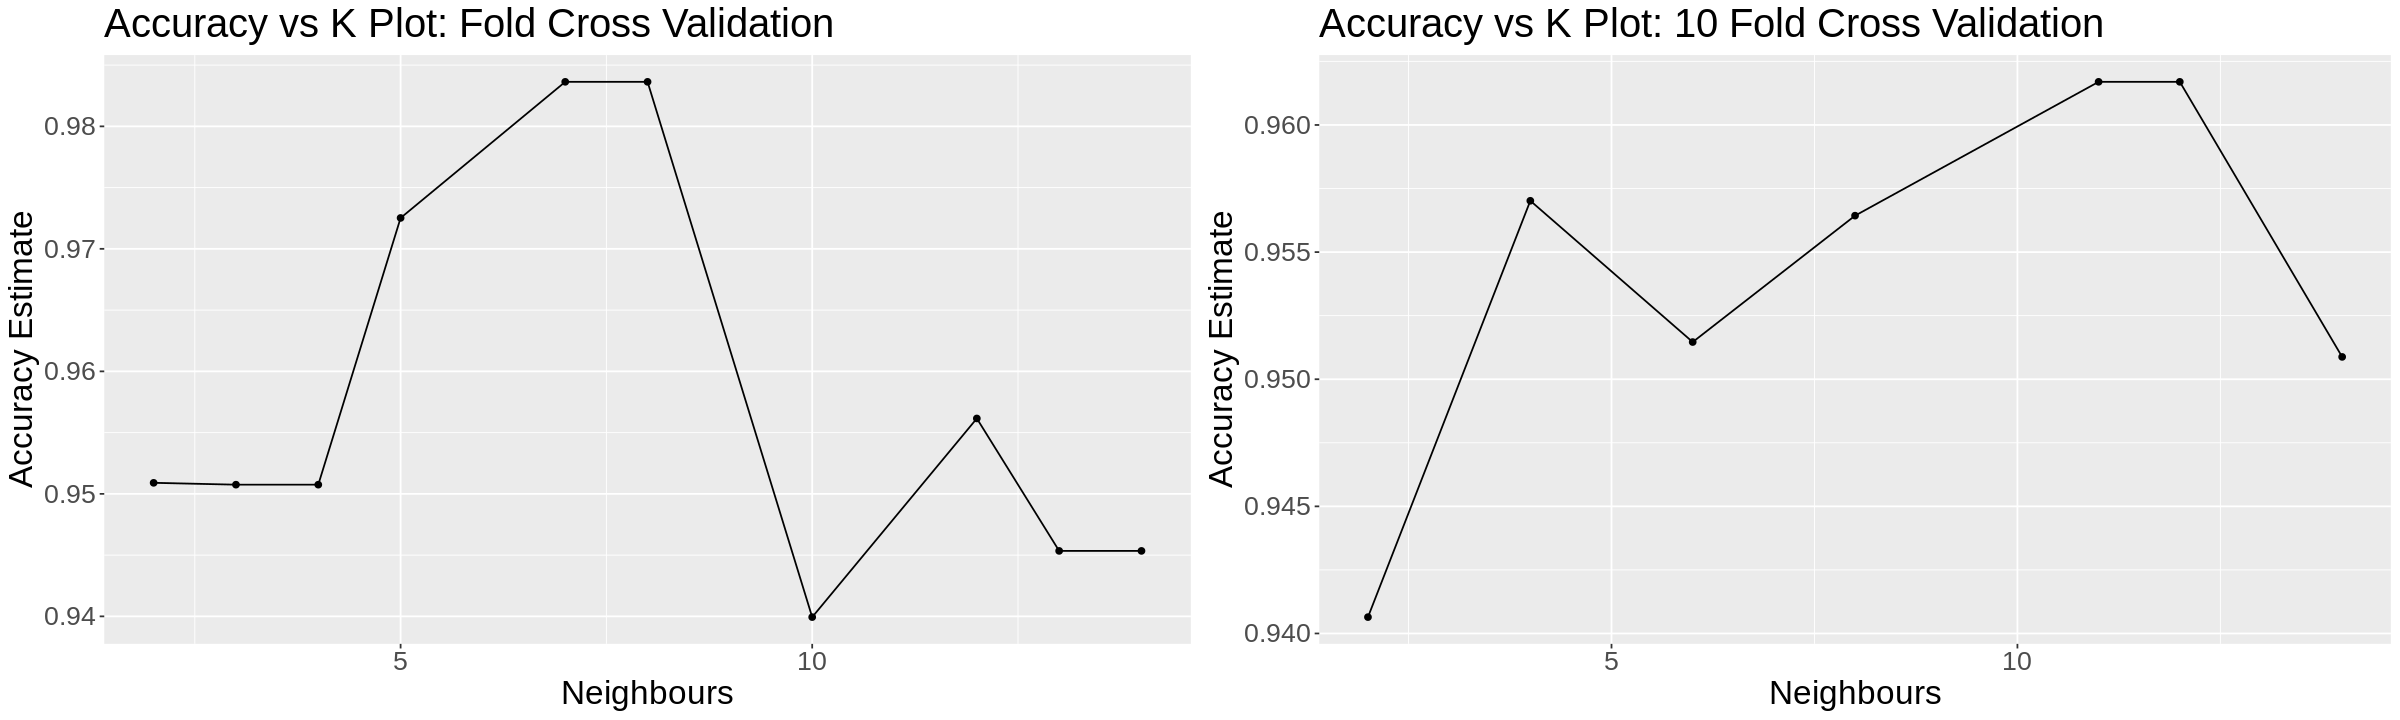

In [15]:
options(repr.plot.width = 20, repr.plot.height = 6) 

 accuracies_5_plot <- forest_fire_results_5 %>%
     filter(.metric == "accuracy") %>%
     ggplot(aes(x=neighbors,y=mean))+
     geom_point()+
     geom_line()+
     labs(x='Neighbours', y= 'Accuracy Estimate')+
     ggtitle('Accuracy vs K Plot: Fold Cross Validation')+
    theme(text = element_text(size = 20))

 accuracies_10_plot <- forest_fire_results_10 %>%
     filter(.metric == "accuracy") %>%
     ggplot(aes(x=neighbors,y=mean))+
     geom_point()+
     geom_line()+
     labs(x='Neighbours', y= 'Accuracy Estimate')+
     ggtitle('Accuracy vs K Plot: 10 Fold Cross Validation')+
    theme(text = element_text(size = 20))



fina_k_plot<- plot_grid(accuracies_5_plot,accuracies_10_plot, ncol=2)
fina_k_plot

 <font color='grey'>Figure 2: Accuracy vs K Plot for 5 Fold Cross Validation compared with Accuracy vs K Graph for 10 Fold Cross validation</font> 

### Discussion:
In conclusion, by using a 5-fold cross validation along with 7 neighbours, we were able to achieve the highest accuracy coupled with the lowest standard error when computing on the training data. Consequently, when the formula was applied to our testing data,  it was determined from Table 7 that our classifier was 97.27% accurate in predicting whether or not a given observation was a forest fire. It was expected that these predictors would allow us to infer if a given observation was or was not a forest fire as the plot in Figure 1 show that these variables displayed a positive correlation as well as clustering with one another.

These findings could lead to increased knowledge and proactivity in stopping forest fires that may occur in areas with similar predictor values to regions that have experienced forest fires. With the increased amounts of climate change in the modern era, there is no doubt that future applications of this model can be utizlied as a prophylactic countermeasure to reduce the chance of forest fires (Government of Canada, 2020). This will also allow wildfire agencies to study past trends based on the data given and provide the appropriate training and education to its first responders.


This report also poses a future question that can be expanded further. Further research should be conducted in determining if variables with low correlation and clustering should be included in the K-NN model. An emphasis on chosing predictors with the highest correlation and clustering may skew the results and consequently, will affect accuracy model. This may be a future topic of interest as we have selected variables based on strong correlation and clustering whilst neglecting the weak ones. As such, we may have introduced some biases in our model.By taking into account variables of different strengths of correlation and clustering, we can modify and reduce the bias of our $K$ Model.


### References
Government of Canada. (2020). *Forest fires*. Retrieved from https://www.nrcan.gc.ca/our-natural-resources/forests-forestry/wildland-fires-insects-disturban/forest-fires/13143.


National Park Service. (2018). *Wildfire Causes and Evaluations*. Retrieved from https://www.nps.gov/articles/wildfire-causes-and-evaluation.htm#:~:text=Nearly%2085%20percent*%20of%20wildland,and%20intentional%20acts%20of%20arson.&amp;text=Lightning%20is%20one%20of%20the%20two%20natural%20causes%20of%20fires.

Faroudja, A., Izeboudjen, N. (2020). Predicting forest fire in Algeria using data mining techniques: Case study of the decision tree algorithm. *International Conference on Advanced Intelligent Systems for Sustainable Development, 363-370*. Retrieved from https://link.springer.com/chapter/10.1007/978-3-030-36674-2_37